# Exploring Financial Data

In this project, I will be exploring the stock prices of some of the largest banks in the US. I'll use this data to discover some of the capabilities of interactive plots within Python as well as perform some cursory analysis. The focus will be on the banks' stocks around the financial crisis of 2008 until early 2017.

## 1. Get the Data

I will be using `pandas_datareader` in order to get data directly from Google Finance. 

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

The stock information will come from the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
# Bank of America
BAC = data.DataReader('BAC', 'google', start='2006-01-01', end='2017-01-01')

# CitiGroup
C = data.DataReader('C', 'google', start='2006-01-01', end='2017-01-01')

# Goldman Sachs
GS = data.DataReader('GS', 'google', start='2006-01-01', end='2017-01-01')

# JPMorgan Chase
JPM = data.DataReader('JPM', 'google', start='2006-01-01', end='2017-01-01')

# Morgan Stanley
MS = data.DataReader('MS', 'google', start='2006-01-01', end='2017-01-01')

# Wells Fargo
WFC = data.DataReader('WFC', 'google', start='2006-01-01', end='2017-01-01')

In [3]:
BAC.head()

Open   High    Low  Close    Volume
Date                                            
2006-01-03  46.92  47.18  46.15  47.08  16296700
2006-01-04  47.00  47.24  46.45  46.58  17757900
2006-01-05  46.58  46.83  46.32  46.64  14970900
2006-01-06  46.80  46.91  46.35  46.57  12599800
2006-01-09  46.72  46.97  46.36  46.60  15620000

As we can see, the data provides the opening and closing prices for the stock, the low and high for each day and the volume of shares traded. 

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [5]:
# Combine the dataframes together
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
bank_stocks.head()

BAC                                     C                       \
             Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                           
2006-01-03  46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04  47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05  46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06  46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09  46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

                       ...        MS                                  WFC  \
             Volume    ...      Open   High    Low  Close   Volume   Open   
Date                   ...                                                  
2006-01-03  1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04  1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05  1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06  1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09  1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

                                           
             High    Low  Close    Volume  
Date                                       
2006-01-03  31.98  31.20  31.90  11016400  
2006-01-04  31.82  31.36  31.53  10871000  
2006-01-05  31.56  31.31  31.50  10158000  
2006-01-06  31.78  31.38  31.68   8403800  
2006-01-09  31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [6]:
# Set the column name levels 
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

## Exploratory Analysis

In [8]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     87.13
MS      89.30
WFC     58.52
dtype: float64

Citigroup had the highest closing price during this time period by a huge margin. However, the magnitude of a stock's price does not indicate its performance - we need to look at the difference between the opening and closing prices of the stock. Thus, we will create a new dataframe indicating the returns of each stock based on the following formula:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

In [10]:
for bank in tickers:
    returns[bank+' Return'] = bank_stocks[bank]['Close'].pct_change()
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.000951
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005714
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586    0.000000

In [11]:
returns.tail()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2016-12-23    0.002662  0.008266   0.003540    0.001841   0.006310    0.003767
2016-12-27    0.000442  0.001640   0.002448    0.000919   0.001393   -0.000179
2016-12-28   -0.012384 -0.017188  -0.003767   -0.007231  -0.011596   -0.011260
2016-12-29   -0.014778 -0.010993  -0.010264   -0.007052  -0.011028   -0.008677
2016-12-30    0.004545  0.000842   0.005332    0.004657   0.002372    0.004923

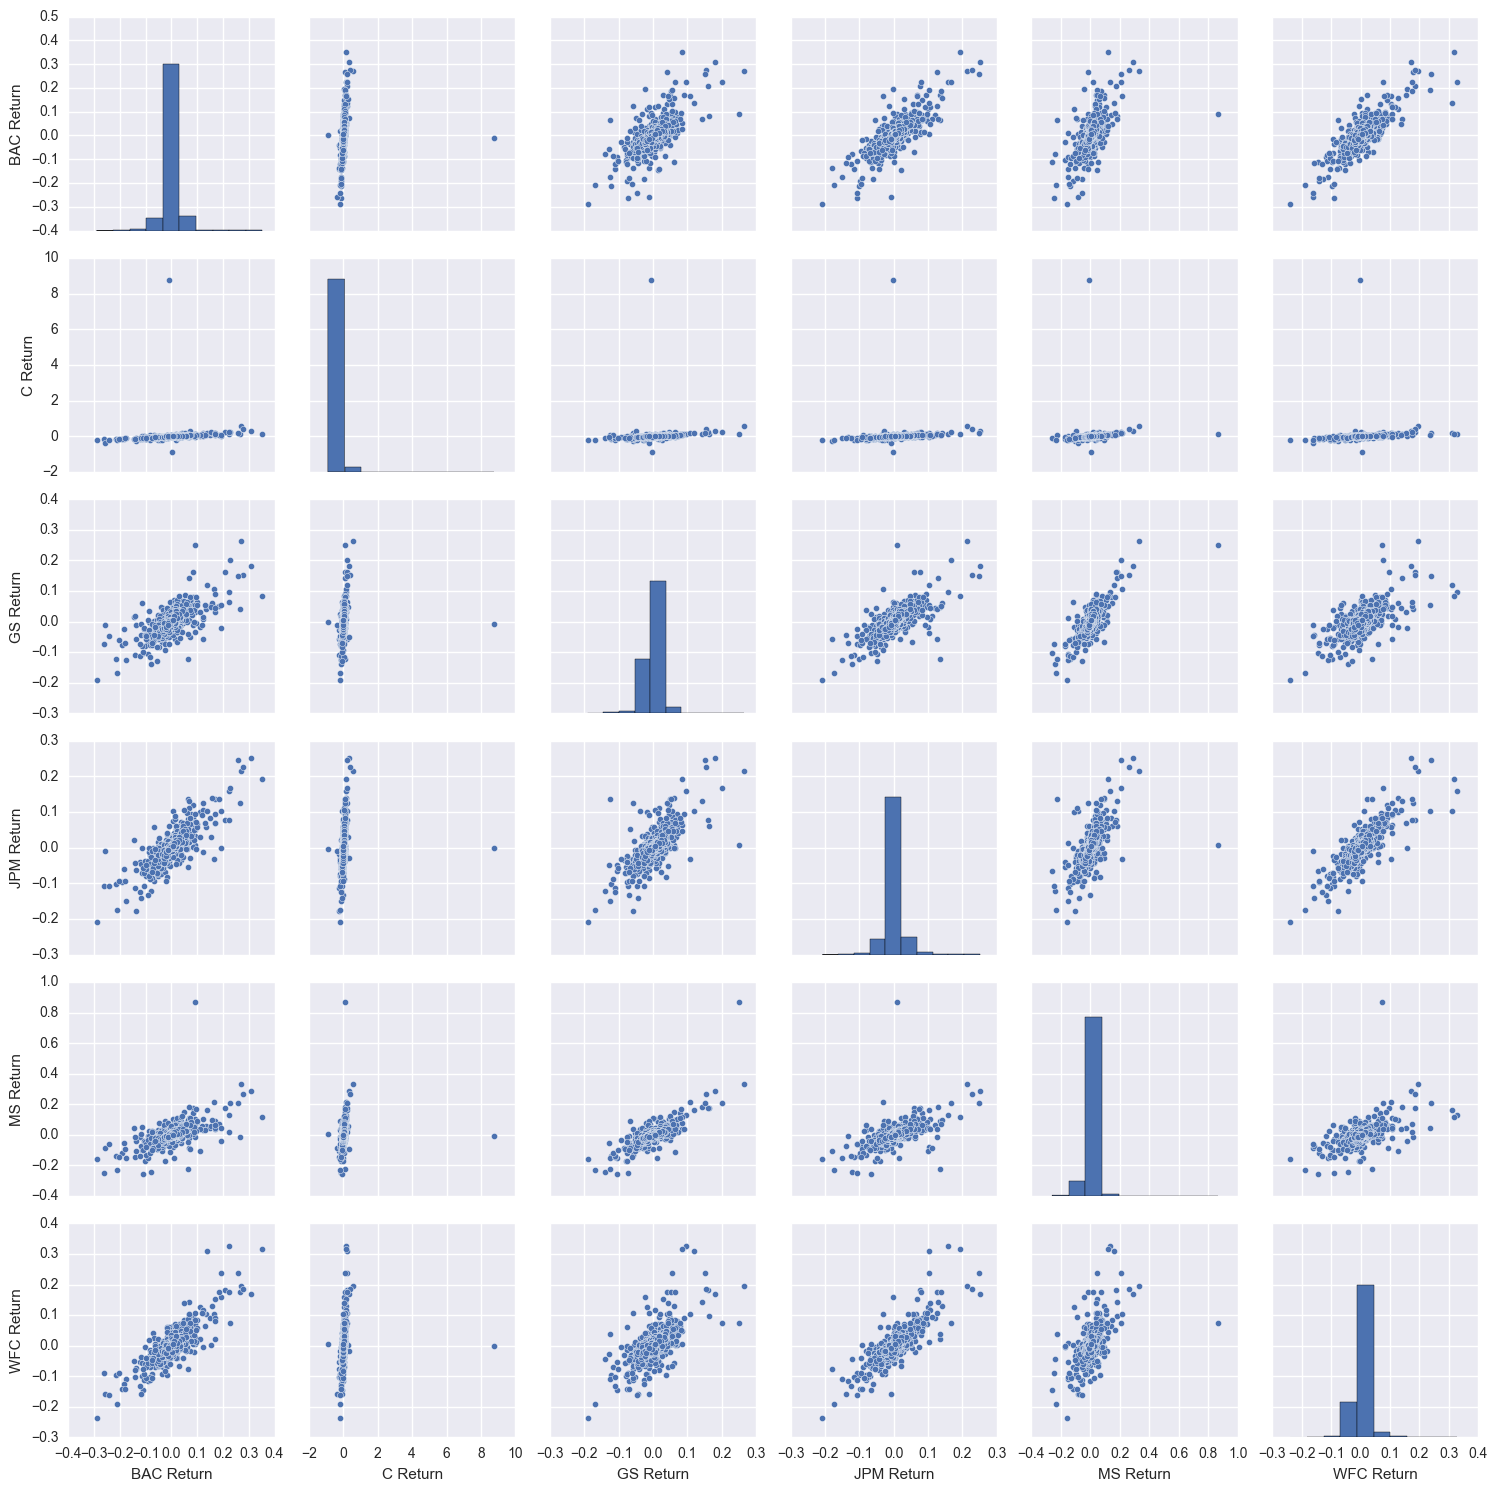

In [12]:
sns.pairplot(returns.dropna())

While most of the banks show returns between -0.3 and 0.3, Citigroup has one outlier near 9 and another near -1.0. Let's see if we can pinpoint these dates.

In [13]:
# Dates of largest drops
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

Interestingly, 4 banks suffered their largest drop on the same day, January 20, 2009. This is when President Obama was inaugurated for his first term. 

In [14]:
# Dates of biggest gains 
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Citigroup's largest drop and biggest gain were very close to one another only being a few days apart. During this timeframe, Citigroup split its stock where "every ten shares of issued and outstanding Citigroup common stock will be automatically combined into one issued and outstanding share of common stock without any change in the par value per share" [(Source)](http://www.citigroup.com/citi/news/2011/110321a.htm), effectively increasing the value of each individual share. 

What stock was riskiest over the whole period? In 2016?

In [15]:
returns.apply(np.std)

BAC Return    0.035464
C Return      0.171654
GS Return     0.024691
JPM Return    0.026779
MS Return     0.036577
WFC Return    0.029174
dtype: float64

In [16]:
returns.ix['2011-05-10':].apply(np.std)

BAC Return    0.022707
C Return      0.021269
GS Return     0.016944
JPM Return    0.016883
MS Return     0.023430
WFC Return    0.014953
dtype: float64

In [17]:
returns.ix['2016-01-01':'2017-01-01'].apply(np.std)

BAC Return    0.020191
C Return      0.019996
GS Return     0.016859
JPM Return    0.015593
MS Return     0.020486
WFC Return    0.015051
dtype: float64

Over the whole period, Citigroup has the riskiest stocks with a standard deviation of 0.17, the second closest is Morgan Stanley whose standard deviation is 0.037. This large difference could be attributed to the very large gain Citigroup got when its stock split, so if we account for risk after that period, then the values are much more similar between the banks. After the Citigroup stock split, the most volatile stock belongs to Morgan Stanley with Bank of America and Citigroup not too far behind. Last year also had Morgan Stanley with the riskiest stock. 

## Additional Visualizations

We can further examine the distribution of returns for the banks with visualizations. 

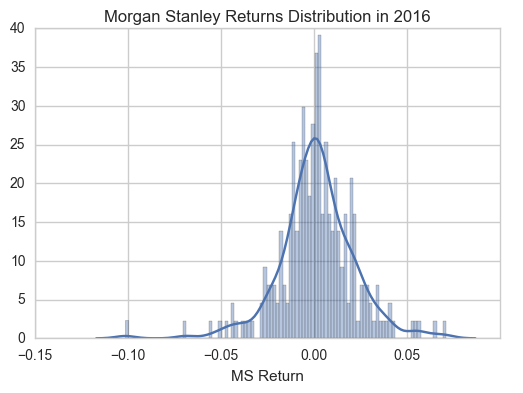

In [38]:
sns.distplot(returns.ix['2016-01-01':'2017-01-01']['MS Return'], bins=100)
plt.title('Morgan Stanley Returns Distribution in 2016')

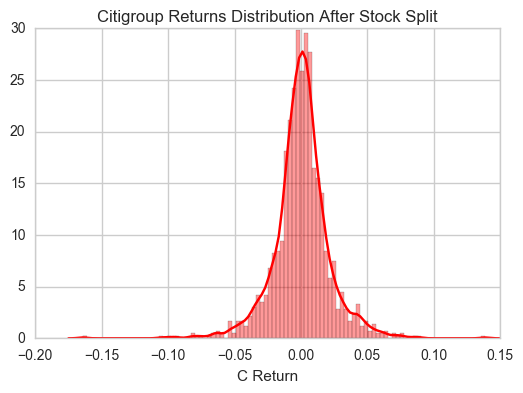

In [37]:
sns.distplot(returns.ix['2011-06-01':]['C Return'], color='red', bins=100)
plt.title('Citigroup Returns Distribution After Stock Split')

In [39]:
# Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

Here, we examine the close prices of the banks over the entire period with an interactive version included as well. 

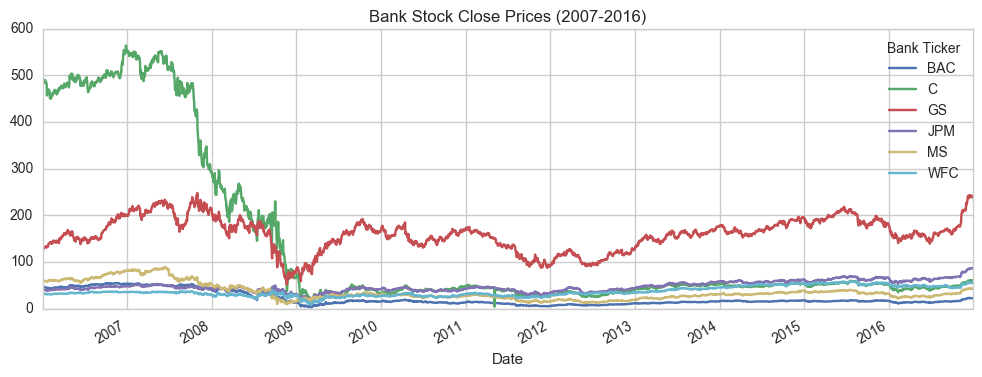

In [43]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(12,4))
plt.title('Bank Stock Close Prices (2007-2016)')

In [44]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot(title='Bank Stock Close Prices (2007-2016)')

As we can see, Citigroup initially had very high stock prices, but declined rapidly over the period of the financial crisis, being affected more than any other bank. Goldman Sachs also saw a large drop in stock price over this period. 

We can also show moving averages of each bank.

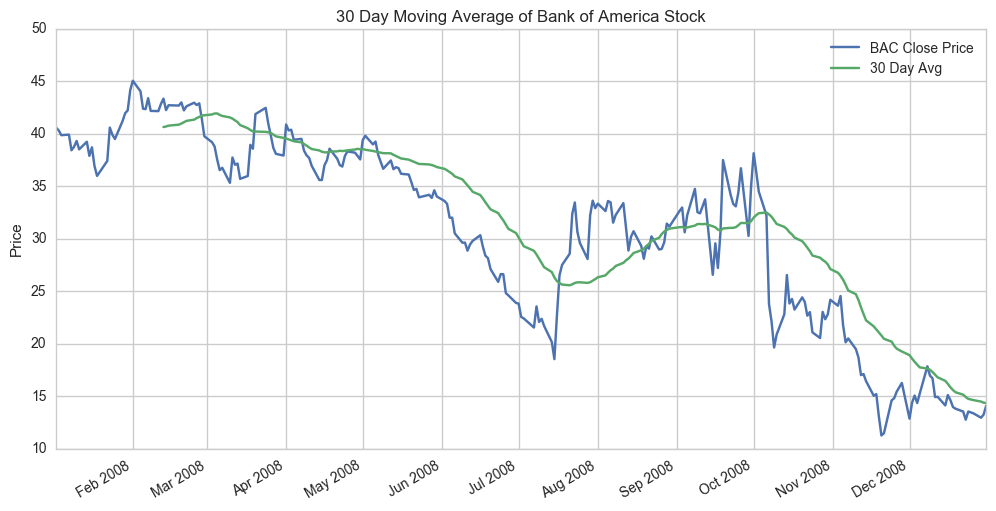

In [50]:
plt.figure(figsize=(12,6))
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC Close Price')
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.title('30 Day Moving Average of Bank of America Stock')
plt.xlabel('')
plt.ylabel('Price')
plt.legend()

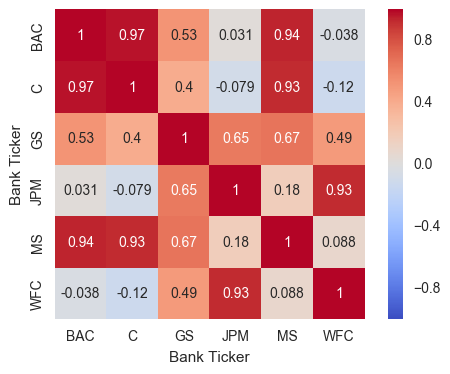

In [47]:
sns.heatmap(data=bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='coolwarm',square=True)

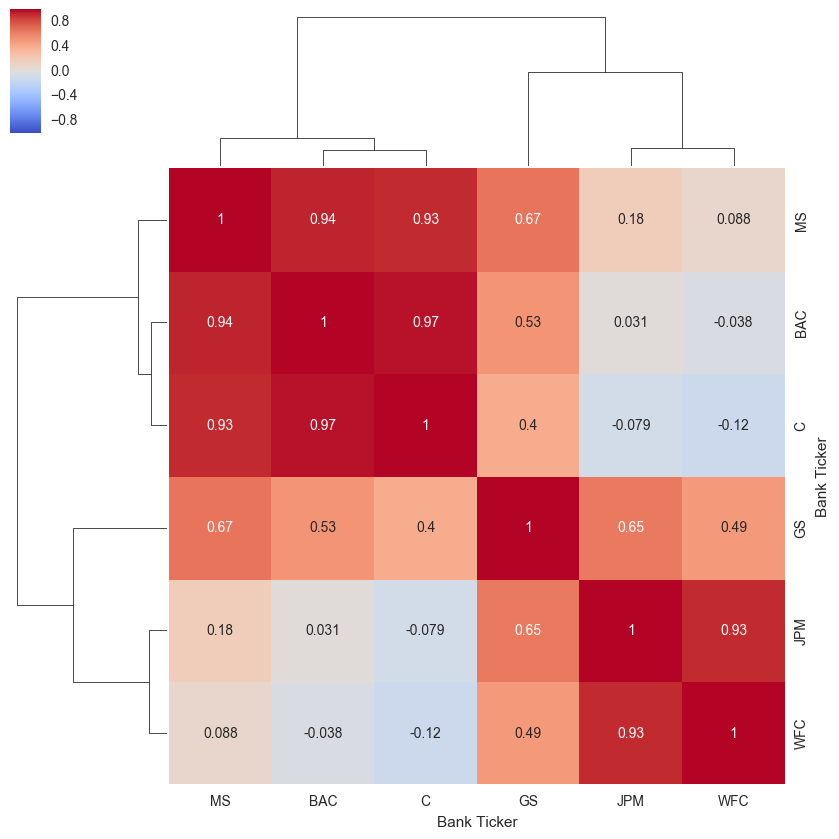

In [26]:
sns.clustermap(data=bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='coolwarm')

Certain banks have highly correlated returns, which might just be a coincidence or point to deeper connections. 

Now, we will rely on the cufflinks library to create some Technical Analysis plots.

In [64]:
BAC['2016-01-01':'2016-02-01'].iplot(kind='candle',title='Candlestick Chart of Bank of America Stock in Jan. 2016')

This candlestick chart shows us the daily movement of the stock prices of Bank of America. Each stick extends from the low to the high price of the day and the boxes represent the opening and closing prices, where a green box indicates a positive return (higher closing price than opening price) and a red box indicates a negative return for that day. During January 2016, Bank of America experienced far more negative returns.  

Earlier, we saw that Morgan Stanley had the most volatile stock in 2016. Let's create a Bollinger Band plot to visualize the volatility.

In [58]:
MS['2016-01-01':'2017-01-01']['Close'].ta_plot(study='boll', title='Morgan Stanley Bollinger Band Plot (2016)')

Morgan Stanley's stock experienced quite a high volatility during November, as we see the lower and upper prices differ greatly. 

We can also follow the relative strength index of a stock over a period of time, which shows the velocity and magnitude of directional price movements.

In [61]:
MS['2016-01-01':'2017-01-01']['Close'].ta_plot(study='rsi', title='Morgan Stanley Relative Strength Index (2016)')